VaR(Value at Risk)

일정 기간 내에 특정 신뢰수준 하에서 발생할 수 있는 최대 손실금액을 의미

## 1. 정규분포 기반 (Parametric VaR) 

In [ ]:
# # 포트폴리오 정보
# portfolio_value = 10_000_000_000  # 100억 원
# daily_volatility = 0.02          # 일간 수익률 변동성: 2%
# confidence_level = 0.99          # 신뢰수준 99%

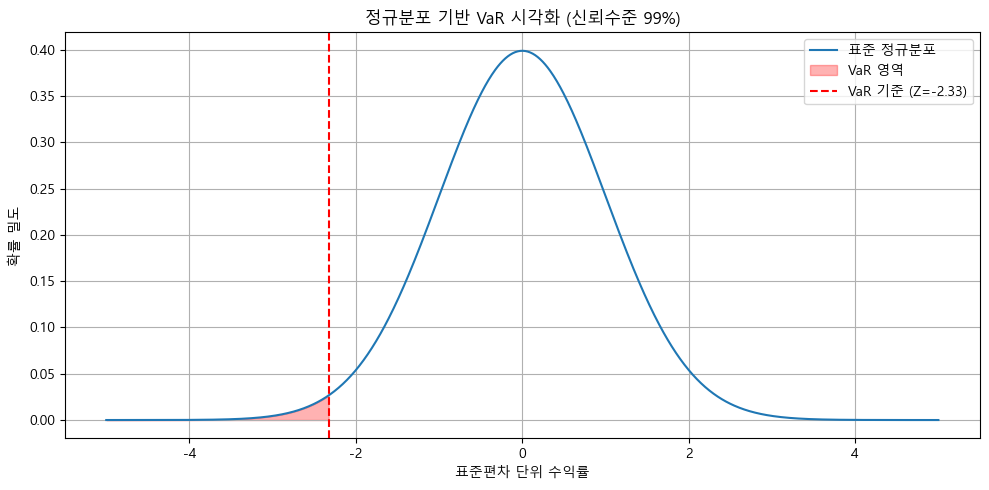

{'신뢰수준': '99%',
 'Z-score': -2.3263,
 '일일 VaR (원)': 465269575,
 '10일 VaR (원)': 1471311582}

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 포트폴리오 정보
portfolio_value = 10_000_000_000  # 100억 원
daily_volatility = 0.02          # 일간 수익률 변동성: 2%
confidence_level = 0.99          # 신뢰수준 99%

# Z-score 계산
z_score = norm.ppf(1 - confidence_level)

# VaR 계산 (단일일 기준)
daily_var = -z_score * daily_volatility * portfolio_value

# 10일 VaR (일간 VaR × sqrt(10))
var_10day = daily_var * np.sqrt(10)

# 시각화: 정규분포 및 VaR 위치
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="표준 정규분포")
plt.fill_between(x, 0, y, where=(x < z_score), color='red', alpha=0.3, label="VaR 영역")
plt.axvline(z_score, color='red', linestyle='--', label=f'VaR 기준 (Z={z_score:.2f})')
plt.title("정규분포 기반 VaR 시각화 (신뢰수준 99%)")
plt.xlabel("표준편차 단위 수익률")
plt.ylabel("확률 밀도")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 출력
{
    "신뢰수준": f"{int(confidence_level * 100)}%",
    "Z-score": round(z_score, 4),
    "일일 VaR (원)": round(daily_var),
    "10일 VaR (원)": round(var_10day)
}


In [ ]:
# "99% 확률로 하루 동안 4.65억 원 이상 손실이 날 가능성은 없다."
# 단, 1% 확률로 더 큰 손실이 발생할 수 있음 → CVaR, Stress Test 필요.
#  그래프 설명
# 정규분포 곡선 위의 붉은 음영 영역: 손실 발생 확률 1%에 해당
# 붉은 점선 기준 왼쪽 영역은 극단 손실 영역으로, VaR 경계를 나타냅니다.

In [ ]:
# # 포트폴리오 정보
# portfolio_value = 10_000_000_000  # 100억 원
# daily_volatility = 0.02          # 일간 수익률 변동성: 2%
# confidence_level = 0.95          # 신뢰수준 95%

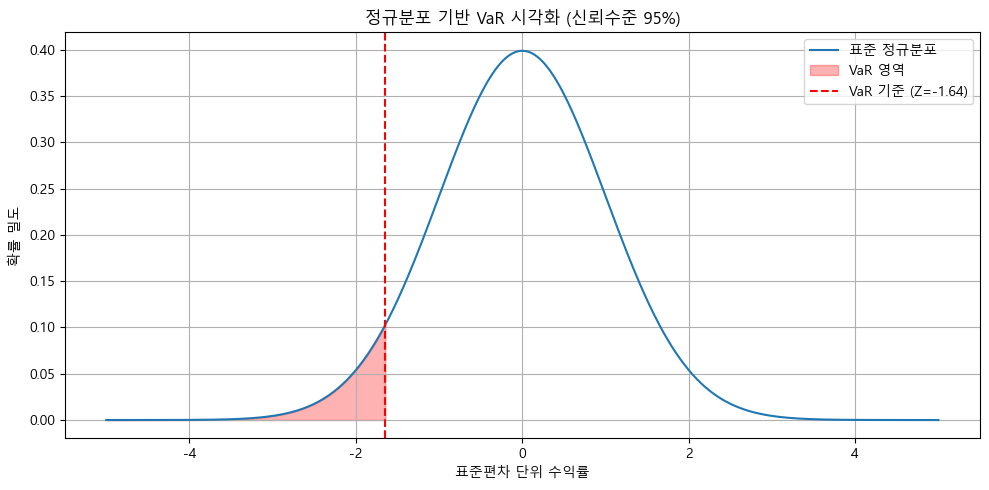

{'신뢰수준': '95%',
 'Z-score': -1.6449,
 '일일 VaR (원)': 328970725,
 '10일 VaR (원)': 1040296776}

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 포트폴리오 정보
portfolio_value = 10_000_000_000  # 100억 원
daily_volatility = 0.02          # 일간 수익률 변동성: 2%
confidence_level = 0.95          # 신뢰수준 99%

# Z-score 계산
z_score = norm.ppf(1 - confidence_level)

# VaR 계산 (단일일 기준)
daily_var = -z_score * daily_volatility * portfolio_value

# 10일 VaR (일간 VaR × sqrt(10))
var_10day = daily_var * np.sqrt(10)

# 시각화: 정규분포 및 VaR 위치
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="표준 정규분포")
plt.fill_between(x, 0, y, where=(x < z_score), color='red', alpha=0.3, label="VaR 영역")
plt.axvline(z_score, color='red', linestyle='--', label=f'VaR 기준 (Z={z_score:.2f})')
plt.title("정규분포 기반 VaR 시각화 (신뢰수준 95%)")
plt.xlabel("표준편차 단위 수익률")
plt.ylabel("확률 밀도")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 출력
{
    "신뢰수준": f"{int(confidence_level * 100)}%",
    "Z-score": round(z_score, 4),
    "일일 VaR (원)": round(daily_var),
    "10일 VaR (원)": round(var_10day)
}

## 2. Historical Simulation

In [ ]:
# 과거 수익률 데이터를 이용하여 손실분포 추정

### 2-1 삼성전자 (99%)

In [ ]:
# # VaR 계산
# confidence_level = 0.99
# hist_var = np.percentile(returns, (1 - confidence_level) * 100)
# portfolio_value = 10_000_000_000
# hist_var_amount = hist_var * portfolio_value

#  최근 2년 자료 

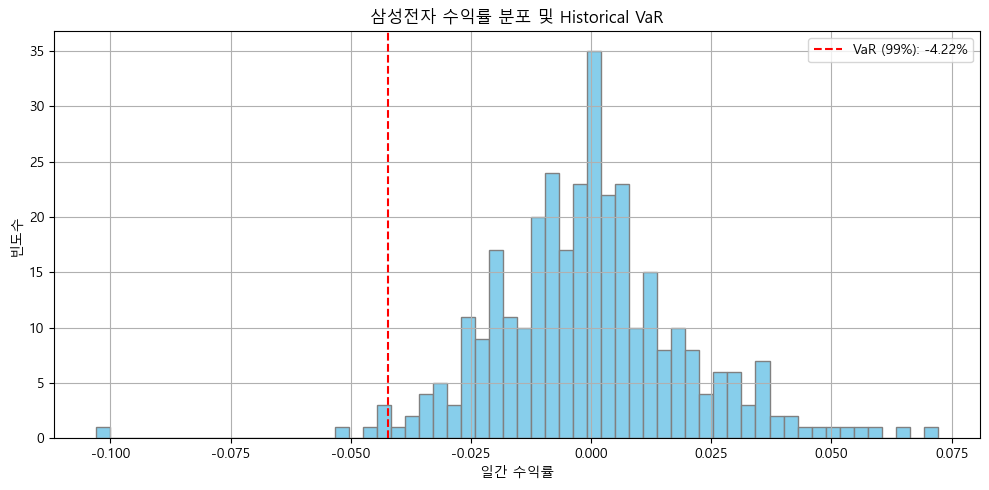

In [10]:
from pykrx import stock
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 수집 : 삼성전자
end_date = datetime.today()
start_date = end_date - timedelta(days=252 * 2)

df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['종가'].pct_change().dropna()

# VaR 계산
confidence_level = 0.99
hist_var = np.percentile(returns, (1 - confidence_level) * 100)
portfolio_value = 10_000_000_000
hist_var_amount = hist_var * portfolio_value

# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(hist_var, color='red', linestyle='--', label=f"VaR (99%): {hist_var:.2%}")
plt.title("삼성전자 수익률 분포 및 Historical VaR")
plt.xlabel("일간 수익률")
plt.ylabel("빈도수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
1. 히스토그램 (막대그래프) – 수익률 분포
X축: 삼성전자의 일간 수익률 (%)
Y축: 해당 수익률 구간이 몇 번 발생했는지 (빈도수)
색상: 보통 연한 파랑 (skyblue)
이 분포는 과거 약 2년간의 실제 수익률을 기준으로 구성되므로, 실제 시장 변동성을 반영합니다.

2. 빨간색 점선 (VaR 기준선) – 위험 경계선
해당 위치의 수익률은 과거 수익률 중 가장 나쁜 1% 구간에 해당하는 손실률입니다.
예: VaR (99%) = -3.2% → 하루에 –3.2% 이상 손실 날 확률은 **1%**라는 뜻

3. VaR 영역 (붉은 음영) – 극단 손실 구간
그래프의 왼쪽 가장 어두운 영역
실제 시장에서 드물게 나타나지만, 매우 치명적인 손실이 발생한 날들이 이 영역에 해당
VaR은 이 경계까지만 리스크를 측정하고, 그 너머의 극단 리스크(CVaR)는 포함하지 않음

🔍 해석 예시
“삼성전자의 과거 수익률을 기준으로 볼 때, 99% 신뢰수준에서 하루 손실이 약 –3.2% 이상일 확률은 1% 미만이다.”
즉, 대부분의 경우 해당 수익률 범위 안에 있지만, 극단적 리스크는 VaR 너머에 숨겨져 있음을 시각적으로 보여줍니다.

### 2-2 삼성전자 (95%) 최근 2년

In [ ]:
# # VaR 계산
# confidence_level = 0.95
# hist_var = np.percentile(returns, (1 - confidence_level) * 100)
# portfolio_value = 10_000_000_000
# hist_var_amount = hist_var * portfolio_value

# 최근 2년자료

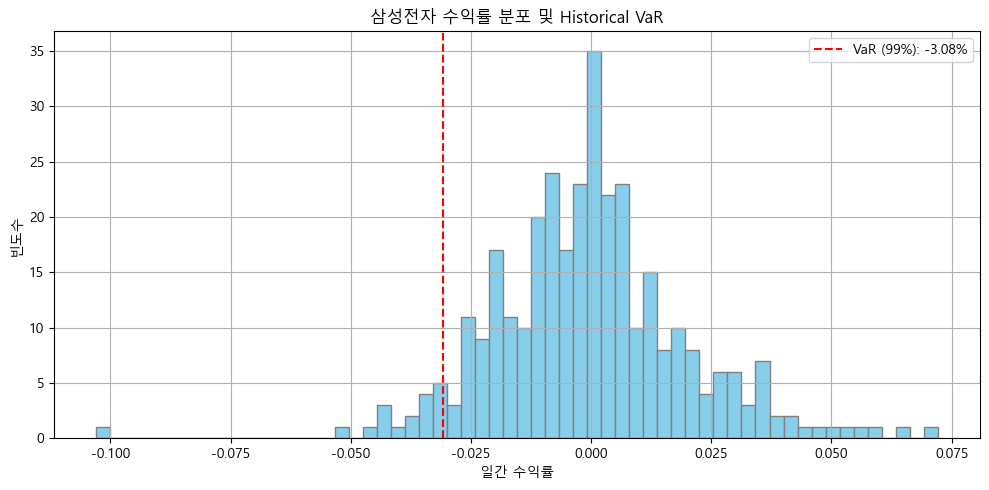

In [11]:
from pykrx import stock
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 수집 : 삼성전자
# timedelta(days=252 * 2)는 거래일 기준 약 2년간의 일수를 의미
end_date = datetime.today()
start_date = end_date - timedelta(days=252 * 2)

df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['종가'].pct_change().dropna()

# VaR 계산
confidence_level = 0.95
hist_var = np.percentile(returns, (1 - confidence_level) * 100)
portfolio_value = 10_000_000_000
hist_var_amount = hist_var * portfolio_value

# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(hist_var, color='red', linestyle='--', label=f"VaR (99%): {hist_var:.2%}")
plt.title("삼성전자 수익률 분포 및 Historical VaR")
plt.xlabel("일간 수익률")
plt.ylabel("빈도수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2-3 삼성전자 (95%) 최근 1년

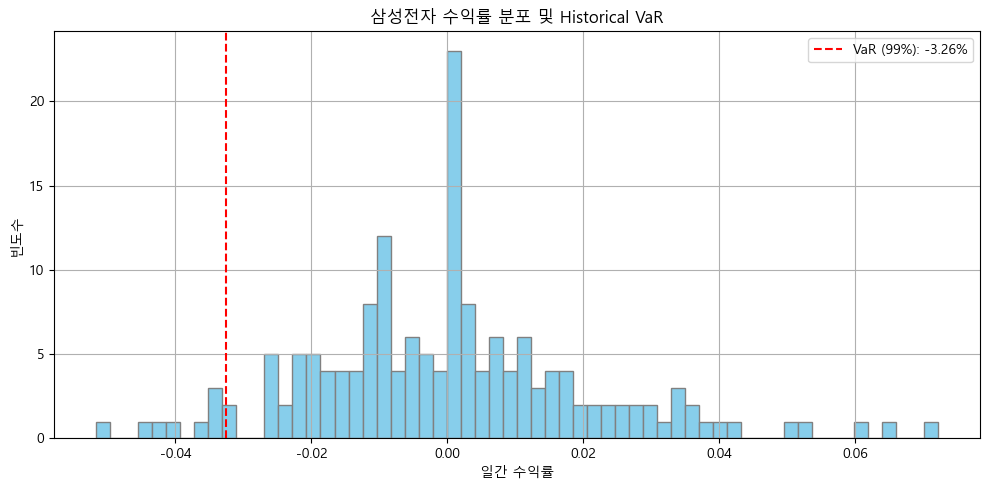

In [12]:
from pykrx import stock
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 수집 : 삼성전자
# timedelta(days=252 * 2)는 거래일 기준 약 2년간의 일수를 의미
end_date = datetime.today()
start_date = end_date - timedelta(days=252)

df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['종가'].pct_change().dropna()

# VaR 계산
confidence_level = 0.95
hist_var = np.percentile(returns, (1 - confidence_level) * 100)
portfolio_value = 10_000_000_000
hist_var_amount = hist_var * portfolio_value

# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(hist_var, color='red', linestyle='--', label=f"VaR (99%): {hist_var:.2%}")
plt.title("삼성전자 수익률 분포 및 Historical VaR")
plt.xlabel("일간 수익률")
plt.ylabel("빈도수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Monte Carlo Simulation

몬테카를로 시뮬레이션(Monte Carlo Simulation)은 복잡한 확률 현상이나 불확실한 시스템을 
수학적으로 모사하기 위해 난수(Random Number)를 사용하여 
수천~수만 번의 시뮬레이션을 반복 수행하는 기법

### 3-1 99% 

In [ ]:
# # 설정: 포트폴리오 정보
# portfolio_value = 10_000_000_000  # 100억 원
# mu = 0.0005       # 일일 기대 수익률 (0.05%)
# sigma = 0.02      # 일일 수익률 변동성 (2%)
# confidence_level = 0.99
# num_simulations = 10000

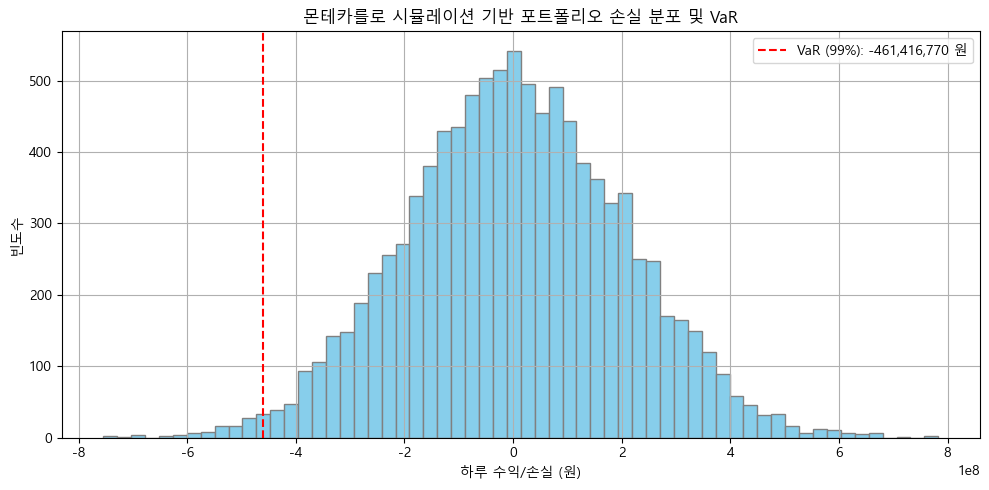

{'신뢰수준': '99%',
 '시뮬레이션 횟수': 10000,
 '기대 수익률 (일간)': '0.05%',
 '변동성 (일간)': '2.00%',
 '몬테카를로 기반 VaR (원)': -461416770}

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 설정: 포트폴리오 정보
portfolio_value = 10_000_000_000  # 100억 원
mu = 0.0005       # 일일 기대 수익률 (0.05%)
sigma = 0.02      # 일일 수익률 변동성 (2%)
confidence_level = 0.99
num_simulations = 10000

# 1. 수익률 시뮬레이션
simulated_returns = np.random.normal(loc=mu, scale=sigma, size=num_simulations)

# 2. 포트폴리오 가치 변화량 계산
simulated_losses = portfolio_value * simulated_returns

# 3. VaR 계산
var_threshold = np.percentile(simulated_losses, (1 - confidence_level) * 100)

# 4. 시각화
plt.figure(figsize=(10, 5))
plt.hist(simulated_losses, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(var_threshold, color='red', linestyle='--', label=f"VaR (99%): {var_threshold:,.0f} 원")
plt.title("몬테카를로 시뮬레이션 기반 포트폴리오 손실 분포 및 VaR")
plt.xlabel("하루 수익/손실 (원)")
plt.ylabel("빈도수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 요약
{
    "신뢰수준": f"{int(confidence_level * 100)}%",
    "시뮬레이션 횟수": num_simulations,
    "기대 수익률 (일간)": f"{mu:.2%}",
    "변동성 (일간)": f"{sigma:.2%}",
    "몬테카를로 기반 VaR (원)": round(var_threshold)
}


### 3-2 95%

In [ ]:
# # 설정: 포트폴리오 정보
# portfolio_value = 10_000_000_000  # 100억 원
# mu = 0.0005       # 일일 기대 수익률 (0.05%)
# sigma = 0.02      # 일일 수익률 변동성 (2%)
# confidence_level = 0.95
# num_simulations = 10000

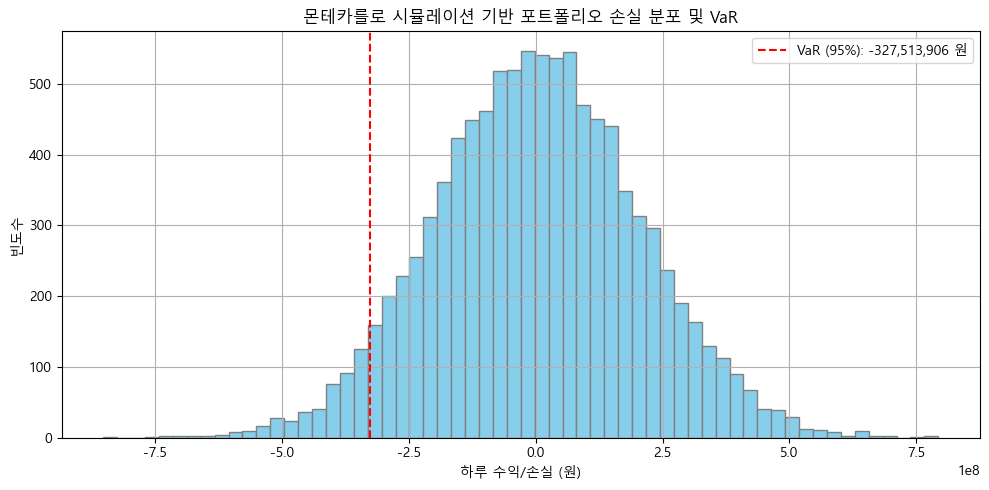

{'신뢰수준': '95%',
 '시뮬레이션 횟수': 10000,
 '기대 수익률 (일간)': '0.05%',
 '변동성 (일간)': '2.00%',
 '몬테카를로 기반 VaR (원)': -327513906}

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 설정: 포트폴리오 정보
portfolio_value = 10_000_000_000  # 100억 원
mu = 0.0005       # 일일 기대 수익률 (0.05%)
sigma = 0.02      # 일일 수익률 변동성 (2%)
confidence_level = 0.95
num_simulations = 10000

# 1. 수익률 시뮬레이션
simulated_returns = np.random.normal(loc=mu, scale=sigma, size=num_simulations)

# 2. 포트폴리오 가치 변화량 계산
simulated_losses = portfolio_value * simulated_returns

# 3. VaR 계산
var_threshold = np.percentile(simulated_losses, (1 - confidence_level) * 100)

# 4. 시각화
plt.figure(figsize=(10, 5))
plt.hist(simulated_losses, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(var_threshold, color='red', linestyle='--', label=f"VaR (95%): {var_threshold:,.0f} 원")
plt.title("몬테카를로 시뮬레이션 기반 포트폴리오 손실 분포 및 VaR")
plt.xlabel("하루 수익/손실 (원)")
plt.ylabel("빈도수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 요약
{
    "신뢰수준": f"{int(confidence_level * 100)}%",
    "시뮬레이션 횟수": num_simulations,
    "기대 수익률 (일간)": f"{mu:.2%}",
    "변동성 (일간)": f"{sigma:.2%}",
    "몬테카를로 기반 VaR (원)": round(var_threshold)
}

## 4. CVaR (Conditional Value at Risk)

In [ ]:
# CVaR (Conditional Value at Risk)는 전통적인 VaR의 한계를 보완한 리스크 측정 지표로,
# "가장 나쁜 손실이 발생할 확률 내에서의 평균 손실을 나타낸다. 
# 즉, 손실이 VaR을 초과했을 때 평균적으로 얼마만큼의 손실이 발생했는지를 보여주는 수치이다.

### 4-1 정규분포 기반 99%

In [ ]:
# 포트폴리오 파라미터
portfolio_value = 10_000_000_000  # 100억 원
mu = 0.0005        # 일일 기대 수익률 (0.05%)
sigma = 0.02       # 일일 변동성 (2%)
alpha = 0.99       # 신뢰수준 99%

In [16]:
import numpy as np
from scipy.stats import norm

# 포트폴리오 파라미터
portfolio_value = 10_000_000_000  # 100억 원
mu = 0.0005        # 일일 기대 수익률 (0.05%)
sigma = 0.02       # 일일 변동성 (2%)
alpha = 0.99       # 신뢰수준 99%

# Z-score 및 PDF 계산
z_alpha = norm.ppf(alpha)
phi_z = norm.pdf(z_alpha)

# VaR 및 CVaR 계산 (금액 단위)
var_amount = portfolio_value * (-mu + z_alpha * sigma)
cvar_amount = portfolio_value * (-mu + (sigma * phi_z) / (1 - alpha))

# 결과 정리
{
    "신뢰수준": f"{int(alpha * 100)}%",
    "Z-score (z_alpha)": round(z_alpha, 4),
    "PDF 값 (phi_z)": round(phi_z, 4),
    "VaR (금액 기준)": f"{var_amount:,.0f} 원",
    "CVaR (금액 기준)": f"{cvar_amount:,.0f} 원"
}


{'신뢰수준': '99%',
 'Z-score (z_alpha)': 2.3263,
 'PDF 값 (phi_z)': 0.0267,
 'VaR (금액 기준)': '460,269,575 원',
 'CVaR (금액 기준)': '528,042,844 원'}

In [ ]:
# VaR 99%: 하루에 약 4.60억 원 이상의 손실이 발생할 확률이 1%
# CVaR 99%: 그 1% 구간에서 손실이 발생할 경우 평균적으로 약 5.28억 원의 손실이 예상됨

### 4-2 정규분포 기반 95%

In [ ]:
# # 포트폴리오 파라미터
# portfolio_value = 10_000_000_000  # 100억 원
# mu = 0.0005        # 일일 기대 수익률 (0.05%)
# sigma = 0.02       # 일일 변동성 (2%)
# alpha = 0.95       # 신뢰수준 95%

In [17]:
import numpy as np
from scipy.stats import norm

# 포트폴리오 파라미터
portfolio_value = 10_000_000_000  # 100억 원
mu = 0.0005        # 일일 기대 수익률 (0.05%)
sigma = 0.02       # 일일 변동성 (2%)
alpha = 0.95       # 신뢰수준 95%

# Z-score 및 PDF 계산
z_alpha = norm.ppf(alpha)
phi_z = norm.pdf(z_alpha)

# VaR 및 CVaR 계산 (금액 단위)
var_amount = portfolio_value * (-mu + z_alpha * sigma)
cvar_amount = portfolio_value * (-mu + (sigma * phi_z) / (1 - alpha))

# 결과 정리
{
    "신뢰수준": f"{int(alpha * 100)}%",
    "Z-score (z_alpha)": round(z_alpha, 4),
    "PDF 값 (phi_z)": round(phi_z, 4),
    "VaR (금액 기준)": f"{var_amount:,.0f} 원",
    "CVaR (금액 기준)": f"{cvar_amount:,.0f} 원"
}


{'신뢰수준': '95%',
 'Z-score (z_alpha)': 1.6449,
 'PDF 값 (phi_z)': 0.1031,
 'VaR (금액 기준)': '323,970,725 원',
 'CVaR (금액 기준)': '407,542,562 원'}

### 4-3 정규분포 기반 : VaR 과 CVaR

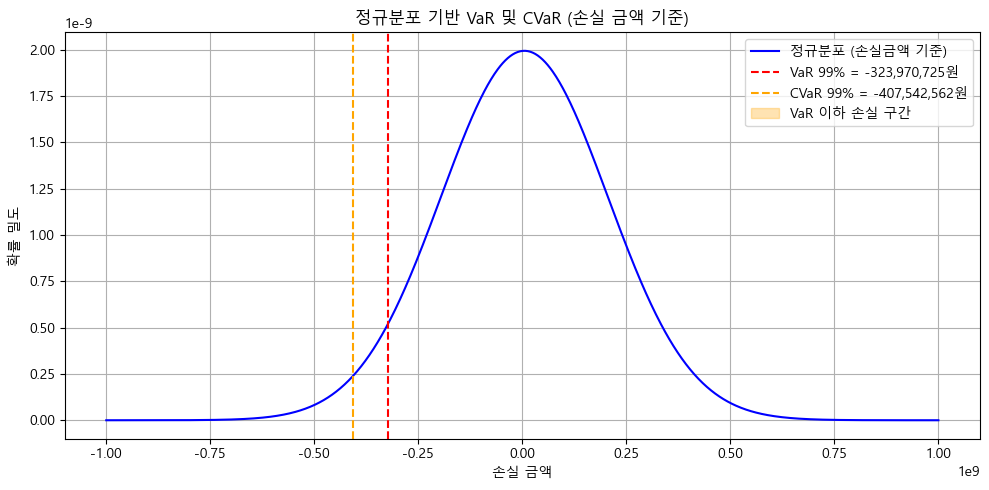

In [21]:
# 포트폴리오 금액 기준 수익률 → 손실금액으로 변환
var_amount_left = var_rate_left * portfolio_value
cvar_amount_left = cvar_rate_left * portfolio_value

# 금액 기준으로 변환된 x축
x_amt = x * portfolio_value
y_amt = norm.pdf(x, loc=mu, scale=sigma) / portfolio_value  # 확률 밀도 보정

# VaR 이하 구간 금액 축
x_cvar_amt = x_amt[x <= var_rate_left * portfolio_value]
y_cvar_amt = y_amt[x <= var_rate_left * portfolio_value]

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(x_amt, y_amt, label='정규분포 (손실금액 기준)', color='blue')

# VaR 금액 기준 선
plt.axvline(var_amount_left, color='red', linestyle='--', label=f'VaR 99% = {var_amount_left:,.0f}원')
# CVaR 금액 기준 선
plt.axvline(cvar_amount_left, color='orange', linestyle='--', label=f'CVaR 99% = {cvar_amount_left:,.0f}원')

# 꼬리 음영 영역
plt.fill_between(x_cvar_amt, 0, y_cvar_amt, color='orange', alpha=0.3, label='VaR 이하 손실 구간')

# 시각 설정
plt.title("정규분포 기반 VaR 및 CVaR (손실 금액 기준)")
plt.xlabel("손실 금액")
plt.ylabel("확률 밀도")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


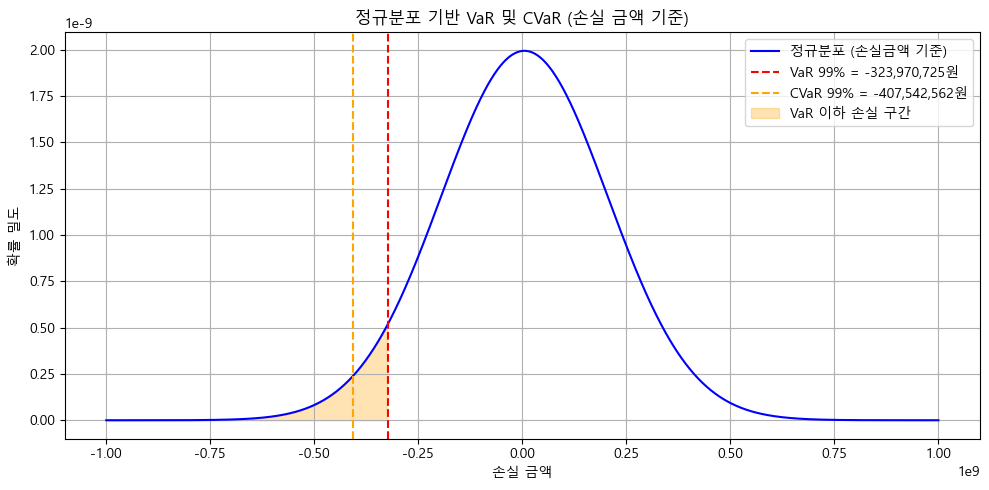

In [22]:
# 손실 금액 기준: 꼬리 구간 재계산 (x_amt 기준으로)
x_amt = x * portfolio_value
y_amt = norm.pdf(x, loc=mu, scale=sigma) / portfolio_value

# VaR 기준선 좌측 값들만 선택 (x값 기준으로 필터링)
mask = x_amt <= var_amount_left
x_cvar_amt = x_amt[mask]
y_cvar_amt = y_amt[mask]

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(x_amt, y_amt, label='정규분포 (손실금액 기준)', color='blue')

# VaR 금액 기준 선
plt.axvline(var_amount_left, color='red', linestyle='--', label=f'VaR 99% = {var_amount_left:,.0f}원')
# CVaR 금액 기준 선
plt.axvline(cvar_amount_left, color='orange', linestyle='--', label=f'CVaR 99% = {cvar_amount_left:,.0f}원')

# 주황색 꼬리 음영 영역 (CVaR 정의역)
plt.fill_between(x_cvar_amt, 0, y_cvar_amt, color='orange', alpha=0.3, label='VaR 이하 손실 구간')

# 시각 설정
plt.title("정규분포 기반 VaR 및 CVaR (손실 금액 기준)")
plt.xlabel("손실 금액")
plt.ylabel("확률 밀도")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 4-4 히스토리컬 CVaR : 최근2년 (99%)

In [23]:
from pykrx import stock
from datetime import datetime, timedelta

# 데이터 수집: 삼성전자 최근 2년
end_date = datetime.today()
start_date = end_date - timedelta(days=252 * 2)
df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['종가'].pct_change().dropna()

# 포트폴리오 금액
portfolio_value = 10_000_000_000  # 100억 원
alpha = 0.99  # 99% 신뢰수준

# 수익률 정렬 (오름차순)
sorted_returns = returns.sort_values()
var_index = int((1 - alpha) * len(sorted_returns))
hist_var_rate = sorted_returns.iloc[var_index]
hist_cvar_rate = sorted_returns.iloc[:var_index].mean()

# 금액으로 변환
hist_var_amt = hist_var_rate * portfolio_value
hist_cvar_amt = hist_cvar_rate * portfolio_value

# 결과 정리
hist_results = {
    "VaR 99% 수익률": hist_var_rate,
    "CVaR 99% 수익률": hist_cvar_rate,
    "VaR 99% 손실금액": hist_var_amt,
    "CVaR 99% 손실금액": hist_cvar_amt,
    "관측치 개수": len(sorted_returns)
}
hist_results


{'VaR 99% 수익률': -0.04230118443316411,
 'CVaR 99% 수익률': -0.06666383295979665,
 'VaR 99% 손실금액': -423011844.3316411,
 'CVaR 99% 손실금액': -666638329.5979666,
 '관측치 개수': 332}

In [ ]:
# 최근 1년 (99%)

In [24]:
from pykrx import stock
from datetime import datetime, timedelta

# 데이터 수집: 삼성전자 최근 1년
end_date = datetime.today()
start_date = end_date - timedelta(days=252)
df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['종가'].pct_change().dropna()

# 포트폴리오 금액
portfolio_value = 10_000_000_000  # 100억 원
alpha = 0.99  # 99% 신뢰수준

# 수익률 정렬 (오름차순)
sorted_returns = returns.sort_values()
var_index = int((1 - alpha) * len(sorted_returns))
hist_var_rate = sorted_returns.iloc[var_index]
hist_cvar_rate = sorted_returns.iloc[:var_index].mean()

# 금액으로 변환
hist_var_amt = hist_var_rate * portfolio_value
hist_cvar_amt = hist_cvar_rate * portfolio_value

# 결과 정리
hist_results = {
    "VaR 99% 수익률": hist_var_rate,
    "CVaR 99% 수익률": hist_cvar_rate,
    "VaR 99% 손실금액": hist_var_amt,
    "CVaR 99% 손실금액": hist_cvar_amt,
    "관측치 개수": len(sorted_returns)
}
hist_results


{'VaR 99% 수익률': -0.04528301886792452,
 'CVaR 99% 수익률': -0.05169340463458105,
 'VaR 99% 손실금액': -452830188.6792452,
 'CVaR 99% 손실금액': -516934046.34581053,
 '관측치 개수': 166}

### 4-5 히스토리컬 VaR & CVaR 

In [ ]:
# 정규분포를 가정하지 않고, 실제 수익률 데이터를 기반으로 극단 손실 구간을 직접 측정
# 데이터가 많을수록 신뢰도 높은 CVaR 추정 가능
# 실제 투자 전략에서 리스크 백테스트 기반 손실 관리에 매우 중요

In [25]:
from pykrx import stock
from datetime import datetime, timedelta
import pandas as pd

# 데이터 수집: 삼성전자 최근 2년
end_date = datetime.today()
start_date = end_date - timedelta(days=252 * 2)

df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['종가'].pct_change().dropna()

# 포트폴리오 금액 설정
portfolio_value = 10_000_000_000  # 100억 원
alpha = 0.99  # 신뢰수준 99%

# 수익률 정렬
sorted_returns = returns.sort_values()

# VaR 계산 (1% 분위수)
var_index = int((1 - alpha) * len(sorted_returns))
hist_var_rate = sorted_returns.iloc[var_index]

# CVaR 계산 (VaR 이하 수익률의 평균)
hist_cvar_rate = sorted_returns.iloc[:var_index].mean()

# 금액 기준 변환
hist_var_amt = hist_var_rate * portfolio_value
hist_cvar_amt = hist_cvar_rate * portfolio_value

# 결과 출력
print("📌 히스토리컬 수익률 기반 VaR & CVaR (삼성전자)")
print(f" - 관측치 수: {len(sorted_returns)}")
print(f" - VaR 99% 수익률: {hist_var_rate:.2%}")
print(f" - CVaR 99% 수익률: {hist_cvar_rate:.2%}")
print(f" - VaR 99% 손실금액: {hist_var_amt:,.0f} 원")
print(f" - CVaR 99% 손실금액: {hist_cvar_amt:,.0f} 원")


📌 히스토리컬 수익률 기반 VaR & CVaR (삼성전자)
 - 관측치 수: 332
 - VaR 99% 수익률: -4.23%
 - CVaR 99% 수익률: -6.67%
 - VaR 99% 손실금액: -423,011,844 원
 - CVaR 99% 손실금액: -666,638,330 원


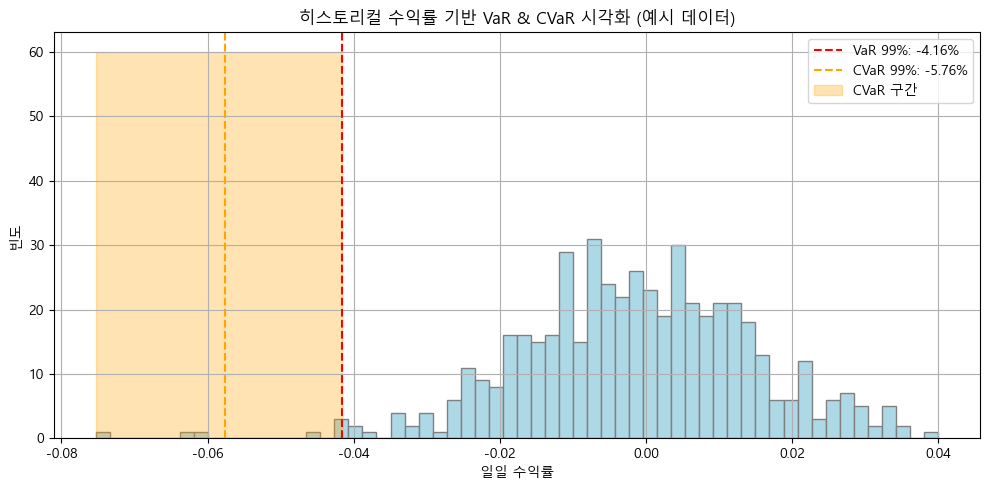

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 예시용: 가상의 수익률 데이터 생성 (정규분포 아님)
np.random.seed(0)
simulated_returns = np.random.normal(loc=-0.0005, scale=0.015, size=500)  # 비대칭 수익률 시뮬레이션
simulated_returns = np.concatenate([simulated_returns, np.random.uniform(-0.08, -0.04, 5)])  # 극단 손실 추가

# 정렬
sorted_returns = pd.Series(simulated_returns).sort_values()
alpha = 0.99
portfolio_value = 10_000_000_000

# 히스토리컬 VaR & CVaR 계산
var_index = int((1 - alpha) * len(sorted_returns))
hist_var = sorted_returns.iloc[var_index]
hist_cvar = sorted_returns.iloc[:var_index].mean()

var_amt = hist_var * portfolio_value
cvar_amt = hist_cvar * portfolio_value

# 시각화
plt.figure(figsize=(10, 5))
plt.hist(simulated_returns, bins=60, color='lightblue', edgecolor='gray')
plt.axvline(hist_var, color='red', linestyle='--', label=f"VaR 99%: {hist_var:.2%}")
plt.axvline(hist_cvar, color='orange', linestyle='--', label=f"CVaR 99%: {hist_cvar:.2%}")

# 꼬리 음영
plt.fill_betweenx(y=[0, 60], x1=sorted_returns.min(), x2=hist_var, color='orange', alpha=0.3, label='CVaR 구간')

# 설정
plt.title("히스토리컬 수익률 기반 VaR & CVaR 시각화 (예시 데이터)")
plt.xlabel("일일 수익률")
plt.ylabel("빈도")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


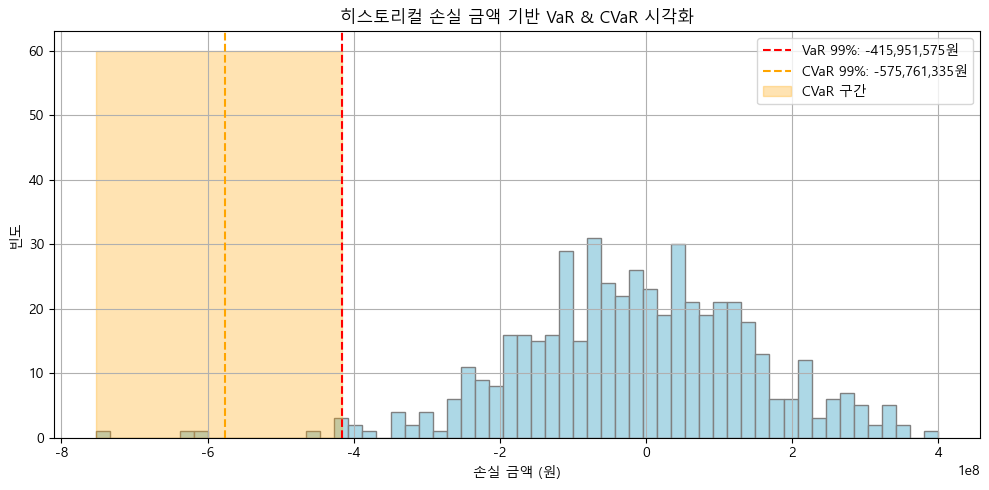

In [27]:
# 손실 금액으로 변환
simulated_loss_amt = simulated_returns * portfolio_value
sorted_loss_amt = np.sort(simulated_loss_amt)

# 금액 기준 VaR & CVaR 계산
var_index_amt = int((1 - alpha) * len(sorted_loss_amt))
hist_var_amt = sorted_loss_amt[var_index_amt]
hist_cvar_amt = sorted_loss_amt[:var_index_amt].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.hist(simulated_loss_amt, bins=60, color='lightblue', edgecolor='gray')
plt.axvline(hist_var_amt, color='red', linestyle='--', label=f"VaR 99%: {hist_var_amt:,.0f}원")
plt.axvline(hist_cvar_amt, color='orange', linestyle='--', label=f"CVaR 99%: {hist_cvar_amt:,.0f}원")

# 꼬리 음영 영역
plt.fill_betweenx(y=[0, 60], x1=sorted_loss_amt.min(), x2=hist_var_amt, color='orange', alpha=0.3, label='CVaR 구간')

# 설정
plt.title("히스토리컬 손실 금액 기반 VaR & CVaR 시각화")
plt.xlabel("손실 금액 (원)")
plt.ylabel("빈도")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 5. 몬테카를로 시뮬레이션(Monte Carlo Simulation) CVaR

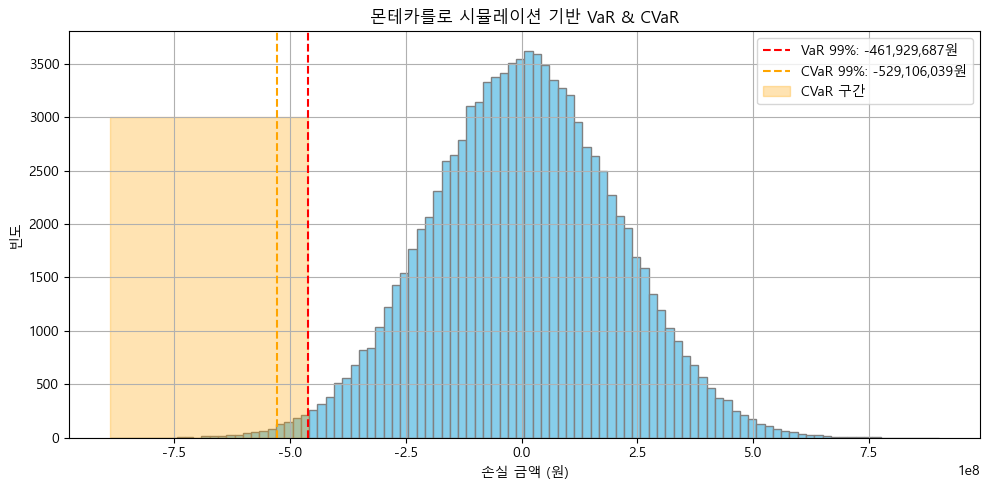

{'VaR 99% 손실금액': -461929686.58062565,
 'CVaR 99% 손실금액': -529106039.10205424,
 '샘플 수': 100000}

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 시뮬레이션 설정
mu = 0.0005          # 일간 기대 수익률 (0.05%)
sigma = 0.02         # 일간 변동성 (2%)
portfolio_value = 10_000_000_000  # 100억 원
alpha = 0.99         # 신뢰수준
num_simulations = 100_000

# 몬테카를로 시뮬레이션
np.random.seed(42)
simulated_returns = np.random.normal(loc=mu, scale=sigma, size=num_simulations)
simulated_losses = simulated_returns * portfolio_value

# 손실 기준 오름차순 정렬
sorted_losses = np.sort(simulated_losses)
var_index = int((1 - alpha) * num_simulations)
mc_var = sorted_losses[var_index]
mc_cvar = sorted_losses[:var_index].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.hist(simulated_losses, bins=100, color='skyblue', edgecolor='gray')
plt.axvline(mc_var, color='red', linestyle='--', label=f'VaR 99%: {mc_var:,.0f}원')
plt.axvline(mc_cvar, color='orange', linestyle='--', label=f'CVaR 99%: {mc_cvar:,.0f}원')
plt.fill_betweenx(y=[0, 3000], x1=sorted_losses.min(), x2=mc_var, color='orange', alpha=0.3, label='CVaR 구간')

plt.title("몬테카를로 시뮬레이션 기반 VaR & CVaR")
plt.xlabel("손실 금액 (원)")
plt.ylabel("빈도")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 결과 요약 출력
{
    "VaR 99% 손실금액": mc_var,
    "CVaR 99% 손실금액": mc_cvar,
    "샘플 수": num_simulations
}


## 6. CVaR 기반 포트폴리오 최적화 

C:\Users\JYB\AppData\Local\Temp\ipykernel_21156\3439294643.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  simulated_returns = np.random.multivariate_normal(mean=mu, cov=cov, size=n_simulations)


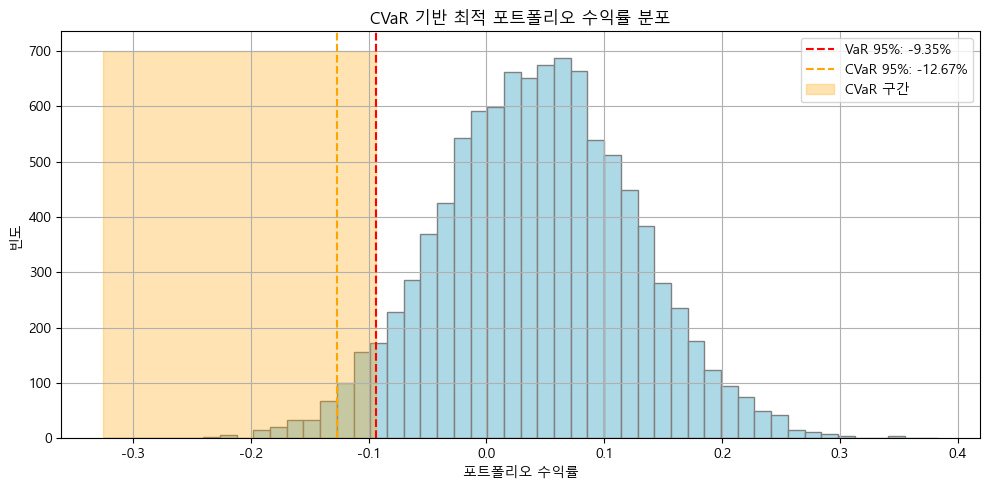

{'최적 자산 비중': [0.2867, 0.0, 0.7133], 'VaR 95%': -0.0935, 'CVaR 95%': -0.1267}

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 설정: 가상의 3자산 기대 수익률 및 공분산
np.random.seed(42)
n_assets = 3
n_simulations = 10000
alpha = 0.95  # 신뢰수준 95%
mu = np.array([0.05, 0.07, 0.04])  # 기대 수익률
cov = np.array([
    [0.10**2, 0.008, 0.006],
    [0.008, 0.12**2, 0.010],
    [0.006, 0.010, 0.08**2]
])

# 1. 시나리오 수익률 생성 (정규분포 기반)
simulated_returns = np.random.multivariate_normal(mean=mu, cov=cov, size=n_simulations)

# 2. 포트폴리오 수익률 함수
def portfolio_returns(weights, scenarios):
    return scenarios @ weights

# 3. CVaR 계산 함수
def cvar_loss(weights):
    port_ret = portfolio_returns(weights, simulated_returns)
    var_threshold = np.percentile(port_ret, 100 * (1 - alpha))
    cvar = -port_ret[port_ret <= var_threshold].mean()  # 손실로 간주해 음수 처리
    return cvar

# 4. 최적화 설정
init_guess = np.array([1/n_assets] * n_assets)
bounds = [(0, 1) for _ in range(n_assets)]
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

# 5. 최적화 수행
result = minimize(cvar_loss, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# 결과
opt_weights = result.x
opt_port_returns = portfolio_returns(opt_weights, simulated_returns)
var_95 = np.percentile(opt_port_returns, 100 * (1 - alpha))
cvar_95 = opt_port_returns[opt_port_returns <= var_95].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.hist(opt_port_returns, bins=50, color='lightblue', edgecolor='gray')
plt.axvline(var_95, color='red', linestyle='--', label=f'VaR 95%: {var_95:.2%}')
plt.axvline(cvar_95, color='orange', linestyle='--', label=f'CVaR 95%: {cvar_95:.2%}')
plt.fill_betweenx(y=[0, 700], x1=min(opt_port_returns), x2=var_95, color='orange', alpha=0.3, label='CVaR 구간')
plt.title("CVaR 기반 최적 포트폴리오 수익률 분포")
plt.xlabel("포트폴리오 수익률")
plt.ylabel("빈도")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 결과 요약
{
    "최적 자산 비중": opt_weights.round(4).tolist(),
    "VaR 95%": round(var_95, 4),
    "CVaR 95%": round(cvar_95, 4)
}


#### 설정: 3개 종목 (삼성전자, SK하이닉스, NAVER)

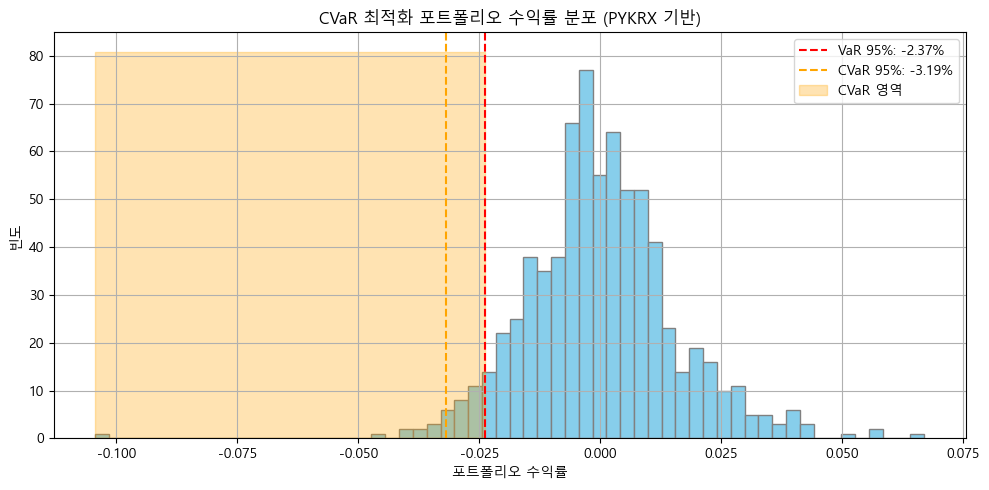

(       종목      비중
 0    삼성전자  0.7153
 1  SK하이닉스  0.0031
 2   NAVER  0.2816,
 -0.023736745142652314,
 -0.0319187707420461)

In [31]:
from pykrx import stock
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 설정: 3개 종목 (삼성전자, SK하이닉스, NAVER)
tickers = {
    "삼성전자": "005930",
    "SK하이닉스": "000660",
    "NAVER": "035420"
}
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 3)

# 1. 가격 데이터 수집
prices = pd.DataFrame()
for name, code in tickers.items():
    df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                        end_date.strftime('%Y%m%d'), code)
    prices[name] = df['종가']

# 2. 수익률 계산
returns = np.log(prices / prices.shift(1)).dropna()
simulated_returns = returns.values
alpha = 0.95
n_assets = len(tickers)

# 3. 포트폴리오 수익률 및 CVaR 함수
def portfolio_returns(weights, scenarios):
    return scenarios @ weights

def cvar_loss(weights):
    port_ret = portfolio_returns(weights, simulated_returns)
    var_threshold = np.percentile(port_ret, 100 * (1 - alpha))
    cvar = -port_ret[port_ret <= var_threshold].mean()
    return cvar

# 4. 최적화
init_guess = np.repeat(1/n_assets, n_assets)
bounds = [(0, 1)] * n_assets
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
result = minimize(cvar_loss, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
opt_weights = result.x
opt_port_ret = portfolio_returns(opt_weights, simulated_returns)
VaR = np.percentile(opt_port_ret, 100 * (1 - alpha))
CVaR = opt_port_ret[opt_port_ret <= VaR].mean()

# 5. 시각화
plt.figure(figsize=(10, 5))
plt.hist(opt_port_ret, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(VaR, color='red', linestyle='--', label=f'VaR 95%: {VaR:.2%}')
plt.axvline(CVaR, color='orange', linestyle='--', label=f'CVaR 95%: {CVaR:.2%}')
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=min(opt_port_ret), x2=VaR, color='orange', alpha=0.3, label='CVaR 영역')
plt.title("CVaR 최적화 포트폴리오 수익률 분포 (PYKRX 기반)")
plt.xlabel("포트폴리오 수익률")
plt.ylabel("빈도")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 결과 요약
weights_df = pd.DataFrame({
    '종목': list(tickers.keys()),
    '비중': [round(w, 4) for w in opt_weights]
})
weights_df, VaR, CVaR


## 7. 시나리오 기반 스트레스 테스팅 

C:\Users\JYB\AppData\Local\Temp\ipykernel_21156\335041015.py:40: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


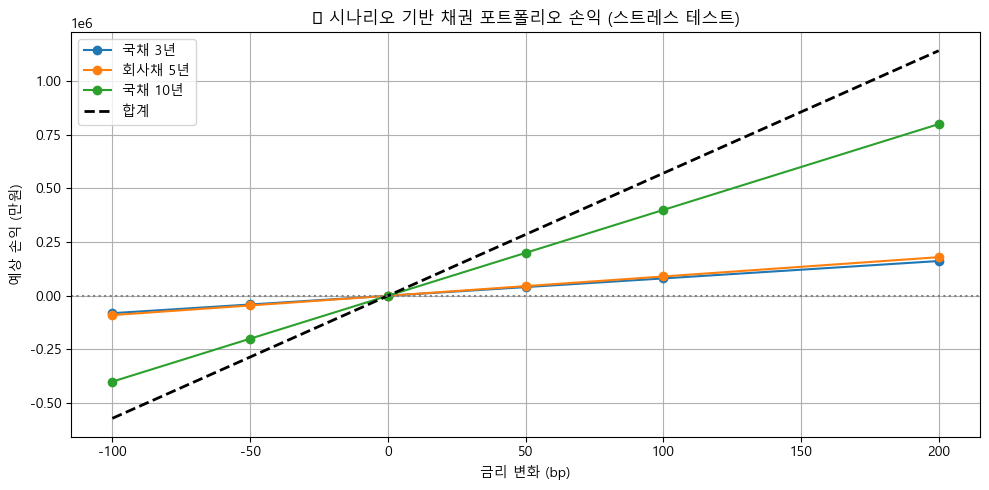

ModuleNotFoundError: No module named 'ace_tools'

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 가정: 채권 포트폴리오
bonds = pd.DataFrame({
    '채권명': ['국채 3년', '회사채 5년', '국채 10년'],
    '시장가치(억원)': [300, 200, 500],
    '수정듀레이션': [2.7, 4.5, 8.0]
})

# 1bp 변화 시 손실액 (DV01) 계산
bonds['DV01(만원)'] = bonds['수정듀레이션'] * bonds['시장가치(억원)'] * 10000 * 0.0001

# 📉 시나리오: 금리 충격 (단위: bp)
scenarios = [-100, -50, 0, 50, 100, 200]
results = {}

# 금리 변화 시 포트폴리오 전체 손익 계산
for bp in scenarios:
    delta = bonds['DV01(만원)'] * bp
    results[f'{bp:+}bp'] = delta

# 결과 정리
df_result = pd.DataFrame(results)
df_result.index = bonds['채권명']
df_result.loc['합계'] = df_result.sum()

# 시각화
plt.figure(figsize=(10, 5))
for idx in df_result.index[:-1]:
    plt.plot(scenarios, df_result.loc[idx], label=idx, marker='o')
plt.plot(scenarios, df_result.loc['합계'], label='합계', color='black', linewidth=2, linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.title("📉 시나리오 기반 채권 포트폴리오 손익 (스트레스 테스트)")
plt.xlabel("금리 변화 (bp)")
plt.ylabel("예상 손익 (만원)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="스트레스 테스트 결과표", dataframe=df_result)


In [34]:
# 표 출력 (기본 방식)
print(df_result)

# 보기 좋게 출력 (선택 사항)
import tabulate
print(tabulate.tabulate(df_result, headers='keys', tablefmt='pretty'))


          -100bp     -50bp  +0bp     +50bp    +100bp     +200bp
채권명                                                            
국채 3년   -81000.0  -40500.0   0.0   40500.0   81000.0   162000.0
회사채 5년  -90000.0  -45000.0   0.0   45000.0   90000.0   180000.0
국채 10년 -400000.0 -200000.0   0.0  200000.0  400000.0   800000.0
합계     -571000.0 -285500.0   0.0  285500.0  571000.0  1142000.0
+------------+-----------+-----------+------+----------+----------+-----------+
|   채권명   |  -100bp   |   -50bp   | +0bp |  +50bp   |  +100bp  |  +200bp   |
+------------+-----------+-----------+------+----------+----------+-----------+
|  국채 3년  | -81000.0  | -40500.0  | 0.0  | 40500.0  | 81000.0  | 162000.0  |
| 회사채 5년 | -90000.0  | -45000.0  | 0.0  | 45000.0  | 90000.0  | 180000.0  |
| 국채 10년  | -400000.0 | -200000.0 | 0.0  | 200000.0 | 400000.0 | 800000.0  |
|    합계    | -571000.0 | -285500.0 | 0.0  | 285500.0 | 571000.0 | 1142000.0 |
+------------+-----------+-----------+------+----------+----------+----